# MEDIÇÕES JJ

In [1]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
import os
from datetime import datetime
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from scipy.optimize import curve_fit

In [2]:
Rj=np.array([3305.89,1158.00667,619.1235,436.30111, 407.6675, 304.09,263.403, 211.71333])/1000
area=np.array([1,2.25,4,6.25,7.3,9,12.25,16])

data_error=np.array([21.3546, 30.6225, 20.9911, 18.0038, 38.65296, 24.14, 20.8263, 40.7376])/1000

area_corr=np.array([1,2.25,4,6.25,4.4,7,12.25,16])

Rj_fit=np.array([619.1235,436.30111, 407.6675, 304.09,263.403, 211.71333])
area_fit=np.array([4,6.25,7.3,9,12.25,16])

In [3]:
def fit_linear(x, y):
    # Número de pontos
    n = len(x)

    # Calcular as somas
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x**2)

    # Calcular os coeficientes da reta
    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
    intercept = (sum_y - slope * sum_x) / n

    return slope, intercept

In [4]:
a,b=fit_linear(1/area,Rj)
print("a=", a)
print("b=", b)

Rj_fit=(a * (1/area)) + b

a= 3.2830111441861107
b= -0.08370779295562725


In [5]:
def linear_function(x, slope, intercept):
    return slope * x + intercept

def linear_fit(x, y):
    popt, pcov = curve_fit(linear_function, x, y)
    slope, intercept = popt
    slope_err, intercept_err = np.sqrt(np.diag(pcov))
    return slope, intercept, slope_err, intercept_err

a1,b1,a1_err,b1_err=linear_fit(1/area,Rj)

print("a=",a1)
print("b=",b1)
print(r'$\Delta$a1=',a1_err)
print(r'$\Delta$b1=',b1_err)

a= 3.2830111358733296
b= -0.08370778833533005
$\Delta$a1= 0.14613063707074203
$\Delta$b1= 0.059522719628536294


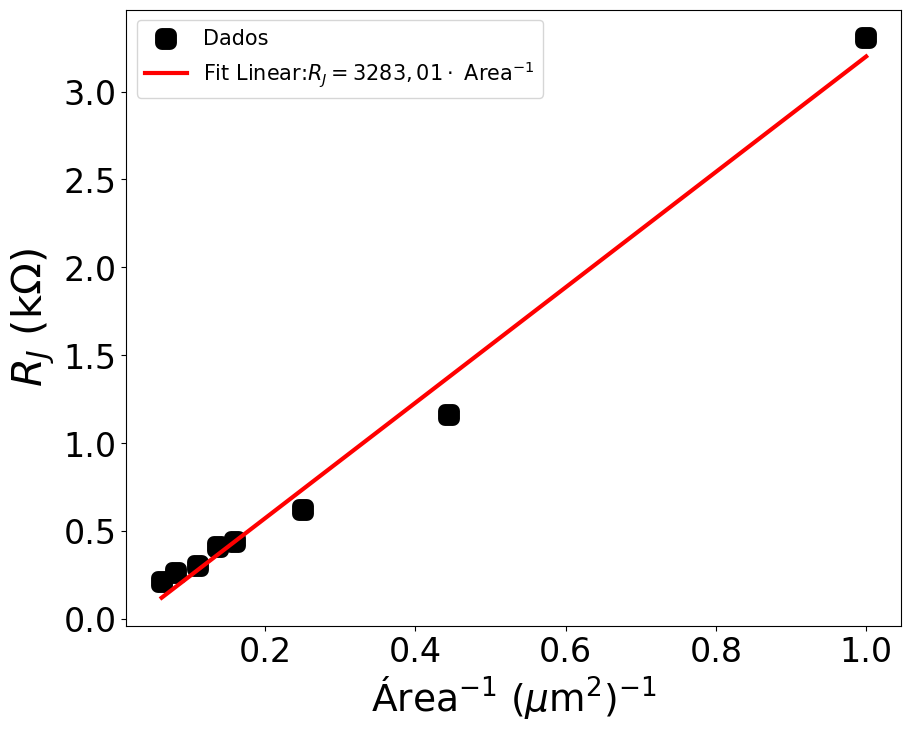

In [6]:
fig, ax = plt.subplots(1, 1, sharex=False, figsize=(10,8))
#plt.suptitle(r'Correção medição $\lambda/4$ do fundo DR 18dBspan (em dB)', fontsize=20)

ax.scatter(1/area, Rj, marker = 's', label='Dados', color='black', linewidth=10)
ax.plot(1/area,Rj_fit, label='Fit Linear:$R_J=3283,01\cdot$ Area$^{-1}$', color='red', linewidth=3)
ax.tick_params(axis='both', which='major', labelsize=24)
#ax.set_title(r"$I_c= 0.4\mu$A")
ax.set_ylabel(r"$R_J$ (k$\Omega$)", fontsize=30)
ax.set_xlabel(r"Área$^{-1}$ ($\mu$m$^2$)$^{-1}$", fontsize=27)
ax.legend(loc='upper left', prop={'size': 15})


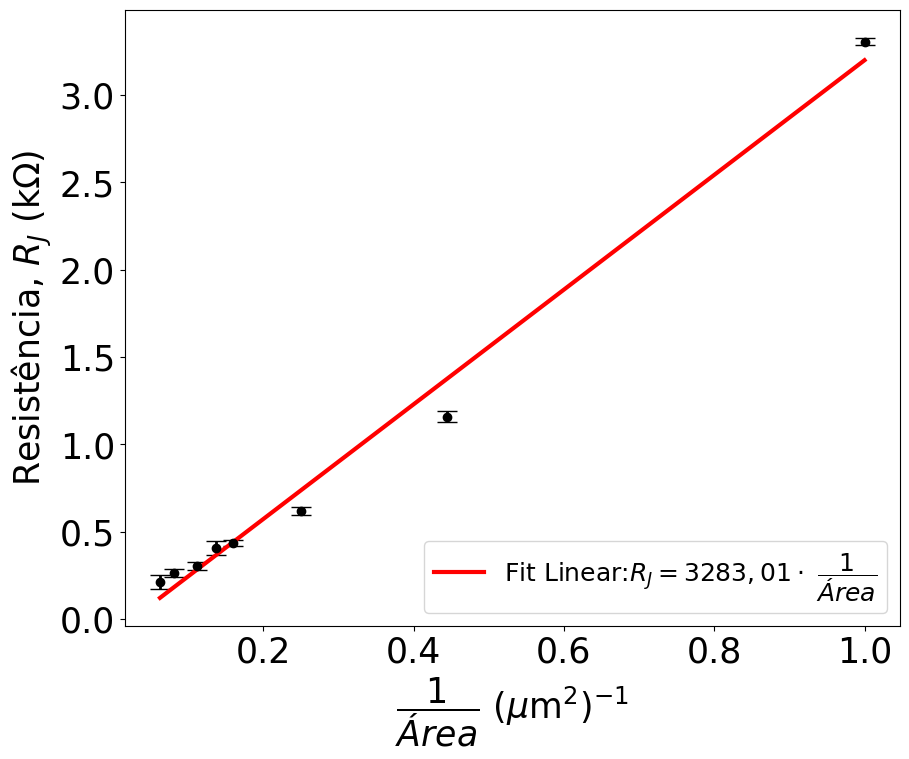

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))

ax.errorbar(1/area,Rj, data_error, fmt='o', capsize=7, linewidth=2, color='black')
ax.plot(1/area,Rj_fit, label='Fit Linear:$R_J=3283,01\cdot$ $\dfrac{1}{Área}$', color='red', linewidth=3)
ax.set_ylabel(r"Resistência, $R_J$ (k$\Omega$)", fontsize=25)
ax.set_xlabel(r"$\dfrac{1}{Área}$ ($\mu$m$^2$)$^{-1}$", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.legend(loc='lower right', prop={'size': 18})


[3.14132314]


C:\Users\molin\AppData\Local\Temp\ipykernel_27888\3552160244.py:30: DeprecationWarning: This method will be removed in a future version of Python. Use 'locale.format_string()' instead.
  axes.plot( x_fit, func(x_fit,popt[0]), '--k',linewidth=5, label=f"Fit: f(x)={locale.format('%.3f', popt[0])}/x")


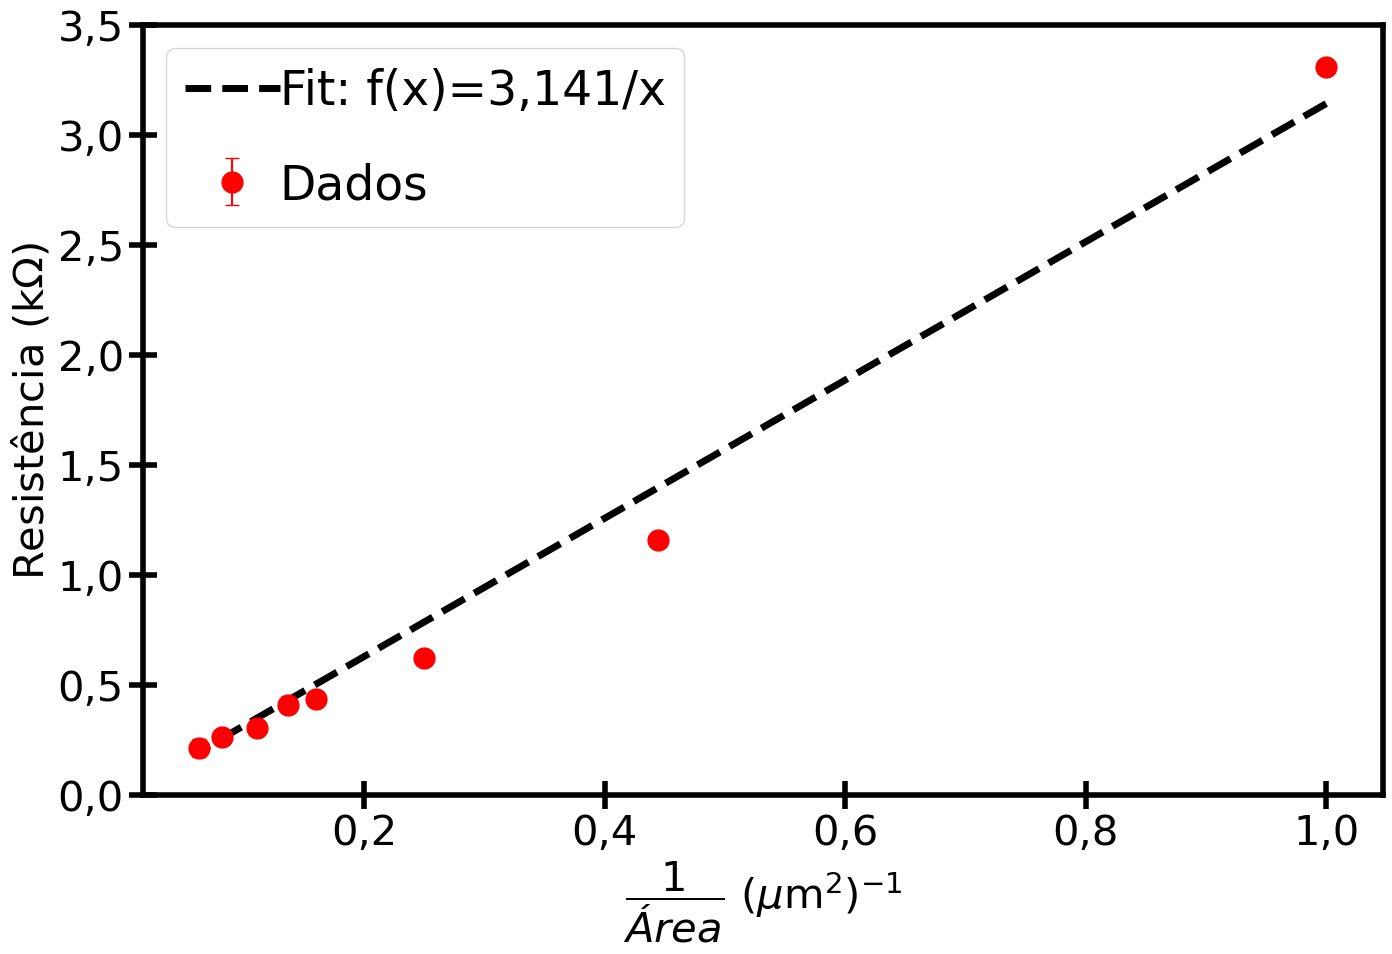

In [49]:
from scipy.optimize import curve_fit
# use comma as decimal
import locale #change to to comma decimal 
locale.setlocale(locale.LC_ALL, "pt_br")
import matplotlib as mpl 
mpl.rcParams['axes.formatter.use_locale'] = True 

import locale
locale.setlocale(locale.LC_ALL, 'nl_NL')


# data
x =1/area
y =Rj


def func(x, a):
    return a*x 

popt, pcov = curve_fit(func, x, y)

print(popt)


fig, axes = plt.subplots(1,1, figsize=(16,10),sharex=True)

x_fit = np.linspace(x[0],x[-1],100)

axes.errorbar(x,y,data_error,fmt='ro', capsize=5, markersize=15, label='Dados')
axes.plot( x_fit, func(x_fit,popt[0]), '--k',linewidth=5, label=f"Fit: f(x)={locale.format('%.3f', popt[0])}/x")

axes.set_ylim(0, 3.5)
axes.set_xlabel(r"$\dfrac{1}{Área}$ ($\mu$m$^2$)$^{-1}$", fontsize=34);
axes.set_ylabel(r'Resistência (k$\Omega$)', fontsize=34);
#axes.text(0.04,27,'Junction resistance as a function of the area',fontsize=34)
for item in ([axes.title, axes.xaxis.label, axes.yaxis.label] +
             axes.get_xticklabels( which="both") + axes.get_yticklabels(which="both")):
    item.set_fontsize(30)

for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(4)    
axes.tick_params(width=4,length=20,direction='inout') 
plt.legend(labelspacing=1, handletextpad=0,fontsize=34)  
# plt.text(0.18,20,r"",fontsize=34)   
#popt, pcov

In [9]:


#fitting exponencial
def power_fit(x,y):
    log_x = np.log(x)
    log_y = np.log(y)
    
    b, log_a = np.polyfit(log_x, log_y, 1)
    
    a = np.exp(log_a)
    
    return a, b

a, b = power_fit(area, Rj)
print('a=',a)
print('b=',b)

x_powerfit=np.linspace(np.min(area),np.max(area),100)
Rj_powerfit=a * x_powerfit**b

a= 2.7942871317176685
b= -0.9754236665443482


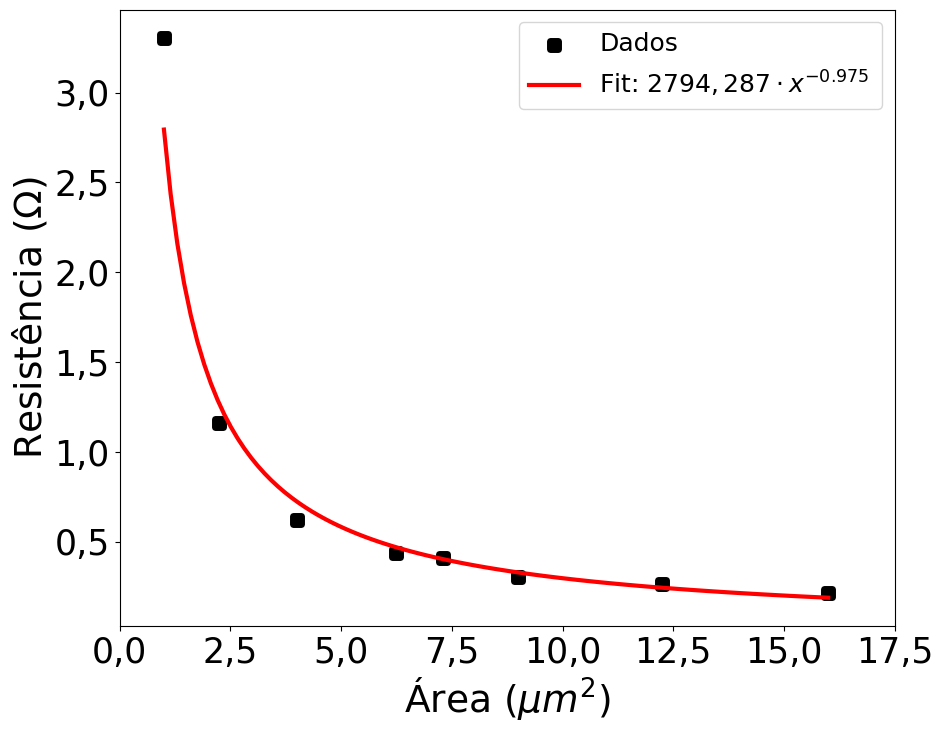

In [10]:
fig, ax = plt.subplots(1, 1, sharex=False, figsize=(10,8))
#plt.suptitle(r'Correção medição $\lambda/4$ do fundo DR 18dBspan (em dB)', fontsize=20)

ax.scatter(area, Rj, marker = 's', label='Dados', color='black', linewidth=5)
ax.plot(x_powerfit,Rj_powerfit, label='Fit: $2794,287\cdot x^{-0.975}$ ', color='red', linewidth=3)
ax.tick_params(axis='both', which='major', labelsize=25)
#ax.set_title(r"$I_c= 0.4\mu$A")
ax.set_xlim(0,17.5)
ax.set_ylabel(r"Resistência ($\Omega$)", fontsize=27)
ax.set_xlabel(r"Área ($\mu m^2$)", fontsize=27)
ax.legend(loc='upper right', prop={'size': 18})

In [11]:
Rj_log=np.log(Rj)
area_log=np.log(area)

In [12]:
Ic=np.array([0.0808,0.2306,0.4313,0.6120,0.6550,0.8781,1.0138,1.2613])
Ic_errorbar=np.array([0.00052178, 0.006098, 0.014623, 0.02526, 0.0621, 0.0697, 0.0802, 0.02427])

In [13]:
m_ic,c_ic=fit_linear(area,Ic)
print("a=", m_ic)
print("b=", c_ic)

Ic_fit=(m_ic*area)+c_ic

a= 0.07750700320904567
b= 0.08295230796436237


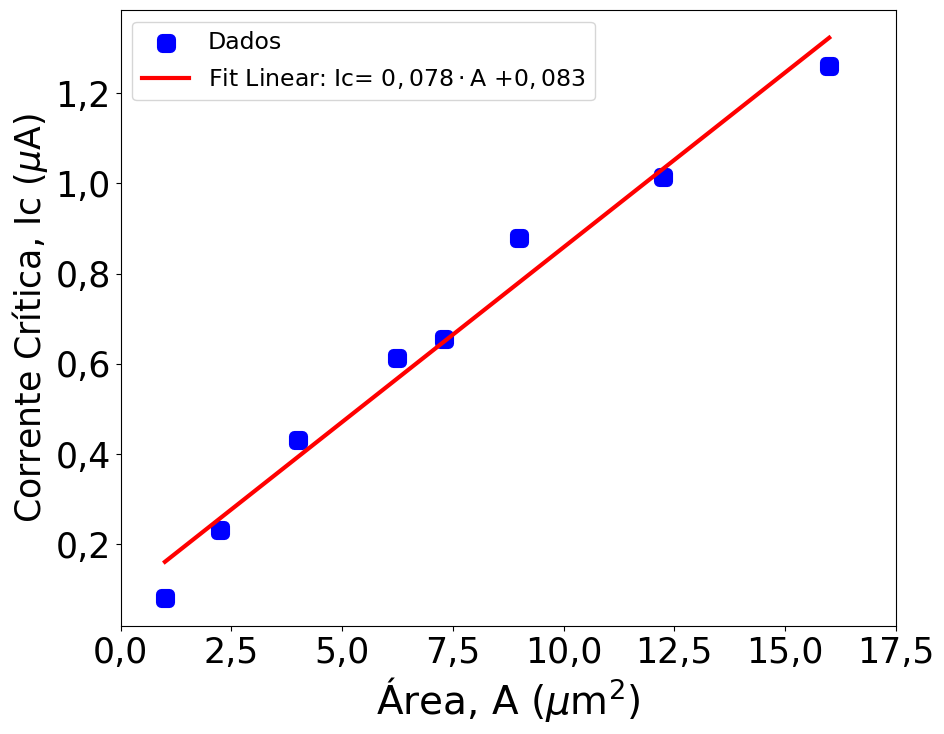

In [14]:
fig, ax = plt.subplots(1, 1, sharex=False, figsize=(10,8))
#plt.suptitle(r'Correção medição $\lambda/4$ do fundo DR 18dBspan (em dB)', fontsize=20)

ax.scatter(area, Ic, marker = 's', label='Dados', color='blue', linewidth=8)
ax.plot(area,Ic_fit, label='Fit Linear: Ic= $0,078\cdot$A $+ 0,083$', color='red', linewidth=3)
ax.tick_params(axis='both', which='major', labelsize=25)
#ax.set_title(r"$I_c= 0.4\mu$A")
ax.set_ylabel(r"Corrente Crítica, Ic ($\mu$A)", fontsize=25)
ax.set_xlabel(r"Área, A ($\mu$m$^2$)", fontsize=28)
ax.set_xlim(0,17.5)
ax.legend(loc='upper left', prop={'size': 17})

[0.077507   0.08295231] [[ 2.24167478e-05 -1.62661526e-04]
 [-1.62661526e-04  1.68539614e-03]]


C:\Users\molin\AppData\Local\Temp\ipykernel_27888\1117700491.py:29: DeprecationWarning: This method will be removed in a future version of Python. Use 'locale.format_string()' instead.
  axes.plot( x_fit, func(x_fit,a[0], a[1]), '--k',linewidth=5, label=f" Fit: f(x)={locale.format('%.3f',a[0])}x"+f"+{locale.format('%.3f',a[1])}")


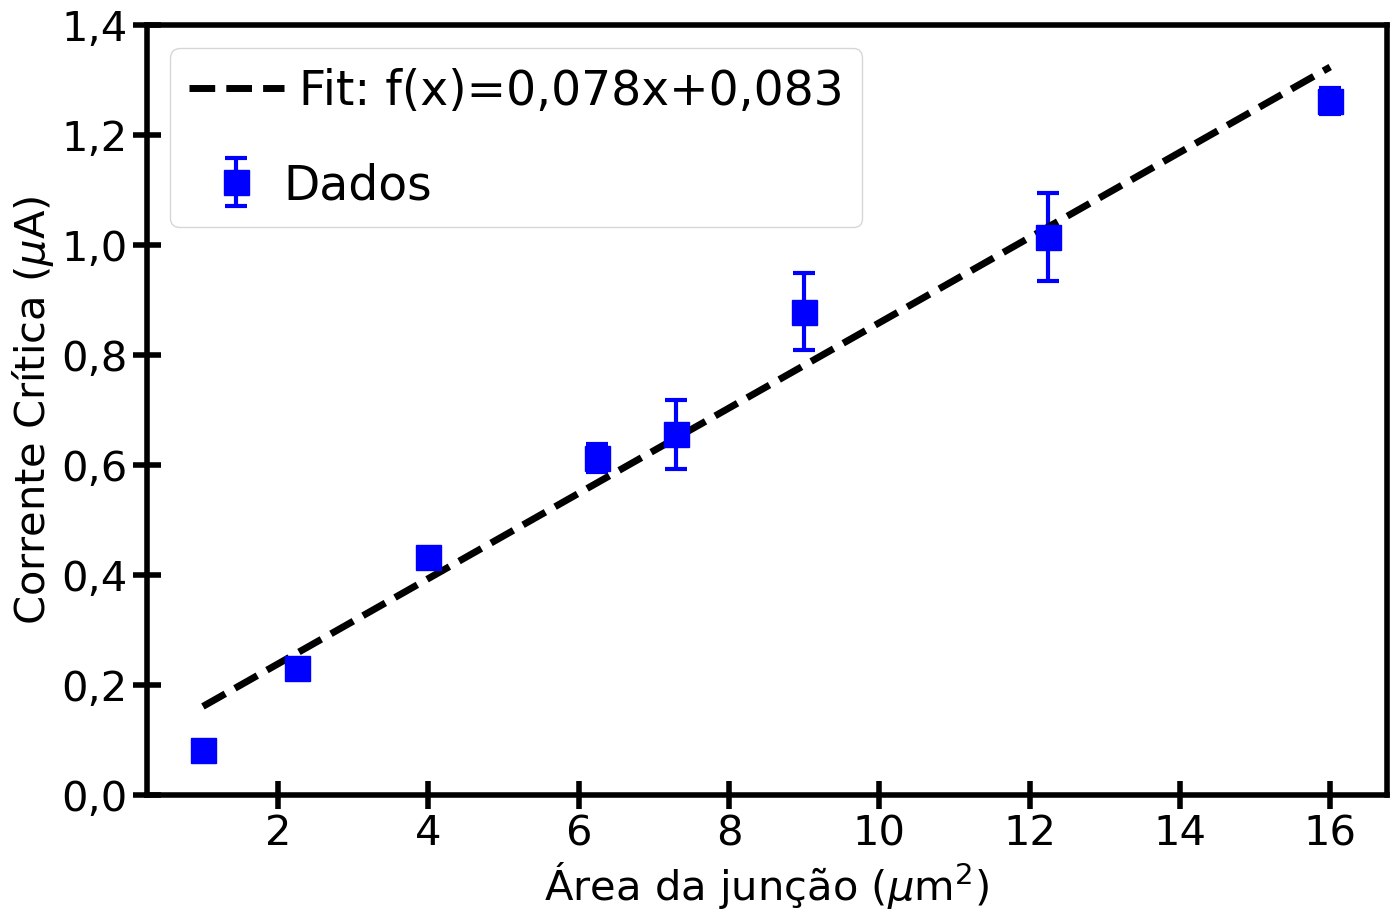

In [53]:
from scipy.optimize import curve_fit
# use comma as decimal
import locale #change to to comma decimal 
locale.setlocale(locale.LC_ALL, "pt_br")
import matplotlib as mpl 
mpl.rcParams['axes.formatter.use_locale'] = True 

import locale
locale.setlocale(locale.LC_ALL, 'nl_NL')

# data
x =area
y =Ic


def func(x, a, b):
    return (a*x)+b 

a, b = curve_fit(func, x, y)

print(a,b)

fig, axes = plt.subplots(1,1, figsize=(16,10),sharex=True)

x_fit = np.linspace(x[0],x[-1],100)
y_fit=func(x_fit,a[0],a[1])

axes.errorbar(x,y,Ic_errorbar,fmt='bs',elinewidth=3,capthick=3, capsize=8, markersize=18, label='Dados')
axes.plot( x_fit, func(x_fit,a[0], a[1]), '--k',linewidth=5, label=f" Fit: f(x)={locale.format('%.3f',a[0])}x"+f"+{locale.format('%.3f',a[1])}")

axes.set_ylim(0, 1.4)
axes.set_xlabel(r"Área da junção ($\mu$m$^2$)", fontsize=34);
axes.set_ylabel(r'Corrente Crítica ($\mu$A)', fontsize=34);
#axes.text(0.04,27,'Junction resistance as a function of the area',fontsize=34)
for item in ([axes.title, axes.xaxis.label, axes.yaxis.label] +
             axes.get_xticklabels( which="both") + axes.get_yticklabels(which="both")):
    item.set_fontsize(30)

for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(4)    
axes.tick_params(width=4,length=20,direction='inout') 
plt.legend(labelspacing=1, handletextpad=0,fontsize=34)  
# plt.text(0.18,20,r"",fontsize=34)   
#popt, pcov

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.interpolate import interp1d
import numpy as np
import pandas as pd
import csv
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from collections import Counter
from scipy import interpolate
from scipy.optimize import leastsq
from scipy import stats
import copy
from io import StringIO
from MyFunctions_1 import *
from scipy.optimize import curve_fit

In [17]:
dose=np.array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175])
dose2=np.array([100, 105, 110, 115, 120])
undercut_no_shadow=np.array([321.429, 306.700, 336.700, 321.500, 370.800, 416.000, 411.000, 429.800, 455.100, 440.700, 406.100, 426.800, 404.700, 503.600, 557.200, 499.100])
undercut_100=np.array([305.900, 346.100, 361.800, 385.000, 368.000, 358.300, 413.400, 402.500, 436.700, 396.000, 520.600, 380.200, 534.200, 537.600, 506.400, 576.000])
undercut_200=np.array([380.900, 399.000, 407.100, 426.700, 414.000])
undercut_300=np.array([444.200, 460.000, 452.100, 409.800, 517.600])
undercut_400=np.array([520.900, 510.500, 511.800, 496.500, 547.800])
undercut_500=np.array([599.400, 530.200, 626.600, 528.300, 620.200])
undercut_600=np.array([574.500, 648.700, 725.900, 644.400, 710.900])
undercut_700=np.array([690.100, 659.700, 788.900, 691.000, 717.300])
undercut_800=np.array([759.400, 776.500, 632.800, 685.100, 566.100])
undercut_900=np.array([589.400, 536.100, 807.000, 736.500,912.400])
undercut_1u=np.array([594.2,673.000,841.900,586.4,946.7])
shadow=np.array([0,100,200,300,400,500,600,700,800,900,1000])
undercut_err=np.array([10.206,10.206,10.206,10.206,10.206])
noshadow_err=np.array([10.206,10.206,10.206,10.206,10.206,10.206,10.206,10.206,10.206,10.206,10.206,10.206,10.206,10.206,10.206,10.206])

In [18]:
data_no_shadow=(np.abs(shadow[0]-undercut_no_shadow)) /1
data_undercut100=(np.abs(shadow[1]-undercut_100)) /shadow[1]
data_undercut200=(np.abs(shadow[2]-undercut_200)) /shadow[2]
data_undercut300=(np.abs(shadow[3]-undercut_300)) /shadow[3]
data_undercut400=(np.abs(shadow[4]-undercut_400)) /shadow[4]
data_undercut500=(np.abs(shadow[5]-undercut_500)) /shadow[5]
data_undercut600=(np.abs(shadow[6]-undercut_600)) /shadow[6]
data_undercut700=(np.abs(shadow[7]-undercut_700)) /shadow[7]
data_undercut800=(np.abs(shadow[8]-undercut_800)) /shadow[8]
data_undercut900=(np.abs(shadow[9]-undercut_900)) /shadow[9]
data_undercut_1u=(np.abs(shadow[10]-undercut_1u)) /shadow[10]

data_undercut600_err=(1/shadow[6])*undercut_err
data_undercut700_err=(1/shadow[7])*undercut_err
data_undercut800_err=(1/shadow[8])*undercut_err
data_undercut900_err=(1/shadow[9])*undercut_err
data_undercut1u_err=(1/shadow[10])*undercut_err




In [19]:
a_undercut,b_undercut=fit_linear(dose2,data_undercut800)
print("a=", a_undercut)
print("b=", b_undercut)

undercut800_fit=a_undercut*dose2+b_undercut

a= 0.01195
b= -1.169475


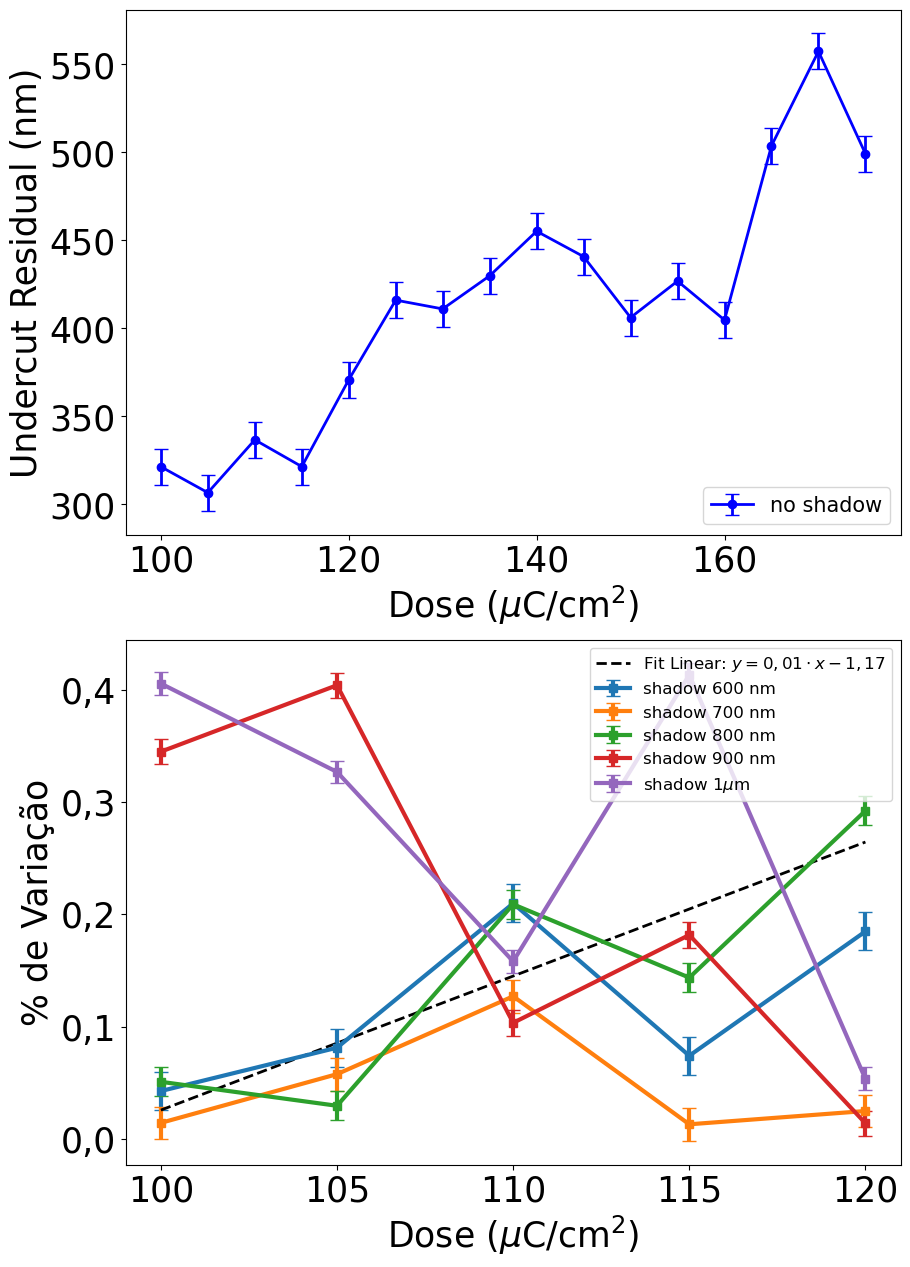

In [20]:
fig, ax = plt.subplots(2, 1, figsize=(10,15))

ax[0].errorbar(dose,data_no_shadow, noshadow_err, fmt='-o', capsize=5, linewidth=2, color='blue', label='no shadow')
#ax[0].plot(dose,data_undercut100, linewidth=2, color='red', label='shadow 100')
ax[0].set_xlabel(r"Dose ($\mu$C/cm$^2$)", fontsize=25)
ax[0].set_ylabel(r"Undercut Residual (nm)", fontsize=25)
ax[0].tick_params(axis='both', which='major', labelsize=25)
ax[0].legend(loc='lower right', prop={'size': 15})

#ax[1].plot(dose2,data_undercut200, linewidth=2, label='shadow 200')
#ax[1].plot(dose2,data_undercut300, linewidth=2, label='shadow 300')
#ax[1].plot(dose2,data_undercut400, linewidth=2, label='shadow 400')

ax[1].errorbar(dose2,data_undercut600,data_undercut600_err, fmt='-s', capsize=5, linewidth=3, label='shadow 600 nm')
ax[1].errorbar(dose2,data_undercut700,data_undercut700_err, fmt='-s', capsize=5, linewidth=3, label='shadow 700 nm')
ax[1].errorbar(dose2,data_undercut800,data_undercut800_err, fmt='-s', capsize=5, linewidth=3, label='shadow 800 nm')
ax[1].errorbar(dose2,data_undercut900,data_undercut900_err, fmt='-s', capsize=5, linewidth=3, label='shadow 900 nm')
ax[1].errorbar(dose2,data_undercut_1u,data_undercut1u_err, fmt='-s', capsize=5, linewidth=3, label='shadow 1$\mu$m')
ax[1].plot(dose2,undercut800_fit, linewidth=2, linestyle='--',color='black', label='Fit Linear: $y=0,01\cdot x-1,17$')
ax[1].set_xlabel(r"Dose ($\mu$C/cm$^2$)", fontsize=25)
ax[1].set_ylabel(r"% de Variação", fontsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=25)
ax[1].legend(loc='upper right', prop={'size': 12})


In [21]:
#fit linear sem undercut
m_u_noshadow,c_u_noshadow=fit_linear(dose,undercut_no_shadow)
print("a1=", m_u_noshadow)
print("b1=", c_u_noshadow)

undercut_no_shadow_fit=(m_u_noshadow*dose)+c_u_noshadow

#fit linear undercut 100nm
m_u_100,c_u_100=fit_linear(dose,undercut_100)
print("a2=", m_u_100)
print("b2=", c_u_100)

undercut_100_fit=(m_u_100*dose)+c_u_100

#fit linear undercut 100nm
m_u_200,c_u_200=fit_linear(dose2,undercut_200)
print("a3=", m_u_200)
print("b3=", c_u_200)

undercut_200_fit=(m_u_200*dose2)+c_u_200

a1= 2.636225000000011
b1= 50.47087499999844
a2= 3.0267352941176333
b2= 10.617647058825469
a3= 1.878
b3= 198.96000000000004


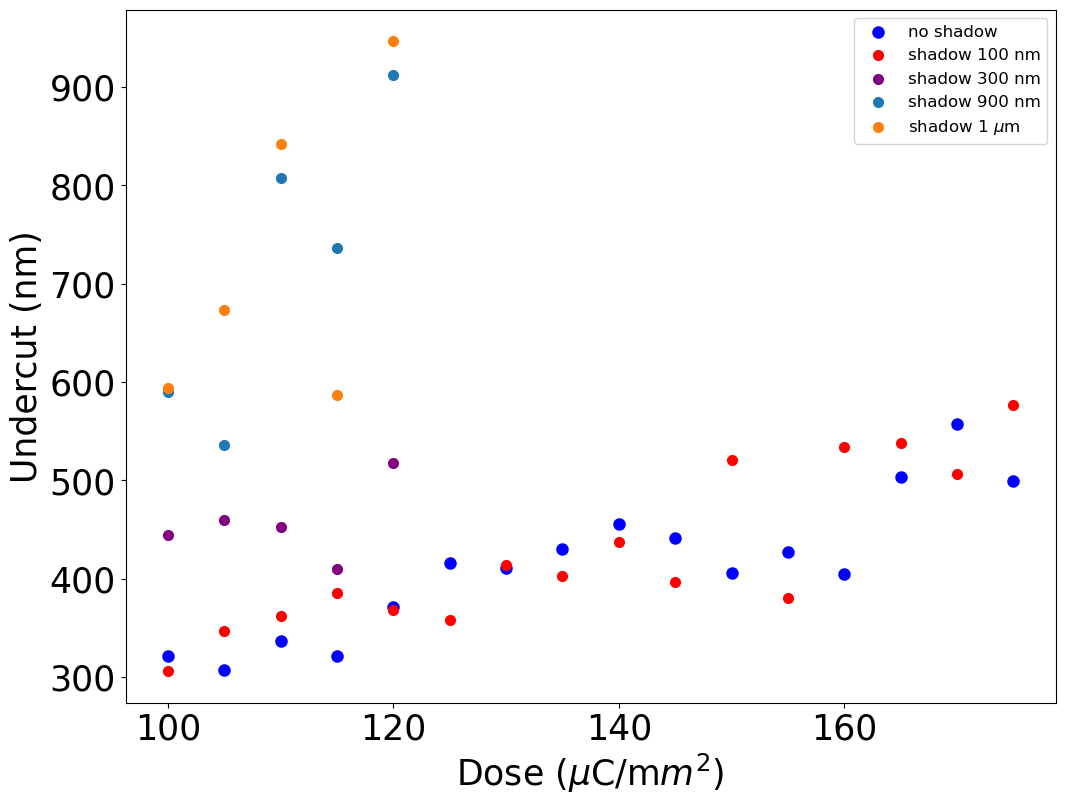

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(12,9))

ax.scatter(dose, undercut_no_shadow, linewidth=3, color='blue', label='no shadow')
ax.scatter(dose, undercut_100, linewidth=2, color='red', label = 'shadow 100 nm')
#ax.scatter(dose2, undercut_200, linewidth=2, color='pink', label = 'shadow 200 nm')
ax.scatter(dose2, undercut_300, linewidth=2, color='purple', label = 'shadow 300 nm')
#ax.scatter(dose2, undercut_400, linewidth=2, color='orange', label = 'shadow 400 nm')
#ax.scatter(dose2, undercut_500, linewidth=2, color='green', label = 'shadow 500 nm')
#ax.scatter(dose2, undercut_600, linewidth=2, color='yellow', label = 'shadow 600 nm')
#ax.scatter(dose2, undercut_700, linewidth=2, color='brown', label = 'shadow 700 nm')
#ax.scatter(dose2, undercut_800, linewidth=2, label = 'shadow 800 nm')
ax.scatter(dose2, undercut_900, linewidth=2, label = 'shadow 900 nm')
ax.scatter(dose2, undercut_1u, linewidth=2, label = 'shadow 1 $\mu$m')
#ax.plot(dose, undercut_no_shadow_fit, linewidth=3, color='red', label='y=2,64$\cdot$x+50,47')
#ax.plot(dose, undercut_100_fit, linewidth=3, color='red', label='y=3,03$\cdot$x+10,62')
#ax.plot(dose2, undercut_200_fit, linewidth=3, color='red', label='y=1,88$\cdot$x+198,96')
#ax.set_title("Simulação HFSS $S_{21}$ do $\lambda/4$", fontsize=25)
ax.set_xlabel(r"Dose ($\mu$C/m$m^2$)", fontsize=25)
ax.set_ylabel(r"Undercut (nm)", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.legend(loc='upper right', prop={'size': 12})

In [23]:


df = pd.DataFrame({
    'IQ':[100,140,90,85,120,110,95], 
    'GPA':[3.2,4.0,2.9,2.5,3.6,3.4,3.0],
    'SALARY':[45e3,150e3,30e3,25e3,75e3,60e3,38e3]
    })

# Get pairwise correlation coefficients
cor = df.corr()

# Independent variables
x = 'IQ'
y = 'GPA'

# Dependent variable
z = 'SALARY'

# Pairings
xz = cor.loc[ x, z ]
yz = cor.loc[ y, z ]
xy = cor.loc[ x, y ]

Rxyz = np.sqrt( (np.abs(xz*2) + np.abs(yz*2)  - 2*xz*yz*xy) / np.abs(1 - np.abs(xy*2)) )
R2 = Rxyz**2

# Calculate adjusted R-squared
n = len(df) # Number of rows
k = 2       # Number of independent variables
R2_adj = 1 - ( ((1-R2)*(n-1)) / (n-k-1) )
R2_adj

2.728237673928212

In [24]:
import pandas as pd

# Dados de exemplo
dados = {
    'Var_Dependente': [10, 20, 30, 40, 50],
    'Var_Independente_1': [1, 2, 3, 4, 5],
    'Var_Independente_2': [5, 4, 3, 2, 1]
}
#x=variável independente 1: a dose
x=dose

#y = variável independente 2: shadows
y=[0,100,200,300,400,500,600,700,800,900,1000]

#z = variável dependente: undercut experimental
z_undercut_noshadow=
z_undercut100
z_undercut200
z_undercut300
z_undercut400
z_undercut500
z_undercut600
z_undercut700
z_undercut800
z_undercut900
z_undercut_1u

# Criar DataFrame a partir dos dados
df = pd.DataFrame(dados)

# Calcular correlação
correlacao = df.corr()

print("Tabela de correlação:")
print(correlacao)

SyntaxError: invalid syntax (1115554664.py, line 16)

# 10 PLOTS SEPARADOS DO TESTE DE UNDERCUT

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12,9))

#####no shadow
ax.scatter(dose, undercut_no_shadow, linewidth=7, color='blue', label='no shadow')
ax.set_title(r'No Shadow', fontsize=25)
ax.set_xlabel(r"Dose ($\mu$C/cm$^2$)", fontsize=25)
ax.set_ylabel(r"Undercut (nm)", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12,9))
#####shadow 100 nm
ax.scatter(dose, undercut_100, linewidth=7, color='black')
ax.set_title(r'Shadow 100 nm', fontsize=25)
ax.set_xlabel(r"Dose ($\mu$C/cm$^2$)", fontsize=25)
ax.set_ylabel(r"Undercut (nm)", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7))
#####shadow 200 nm
ax.scatter(dose2, undercut_200, linewidth=7, color='green', label='no shadow')
ax.set_title(r'Shadow 200 nm', fontsize=25)
ax.set_xlabel(r"Dose ($\mu$C/cm$^2$)", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.set_ylabel(r"Undercut (nm)", fontsize=25)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7))
#####shadow 300 nm
ax.scatter(dose2, undercut_300, linewidth=7, color='red', label='no shadow')
ax.set_title(r'Shadow 300 nm', fontsize=25)
ax.set_xlabel(r"Dose ($\mu$C/cm$^2$)", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.set_ylabel(r"Undercut (nm)", fontsize=25)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7))
#####shadow 400 nm
ax.scatter(dose2, undercut_400, linewidth=7, color='pink', label='no shadow')
ax.set_title(r'Shadow 400 nm', fontsize=25)
ax.set_xlabel(r"Dose ($\mu$C/cm$^2$)", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.set_ylabel(r"Undercut (nm)", fontsize=25)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7))
#####shadow 500 nm
ax.scatter(dose2, undercut_500, linewidth=7, color='yellow', label='no shadow')
ax.set_title(r'Shadow 500 nm', fontsize=25)
ax.set_xlabel(r"Dose ($\mu$C/cm$^2$)", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.set_ylabel(r"Undercut (nm)", fontsize=25)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7))
#####shadow 600 nm
ax.scatter(dose2, undercut_600, linewidth=7, color='purple', label='no shadow')
ax.set_title(r'Shadow 600 nm', fontsize=25)
ax.set_xlabel(r"Dose ($\mu$C/cm$^2$)", fontsize=25)
ax.set_ylabel(r"Undercut (nm)", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7))
#####shadow 700 nm
ax.scatter(dose2, undercut_700, linewidth=7, color='orange', label='no shadow')
ax.set_title(r'Shadow 700 nm', fontsize=25)
ax.set_ylabel(r"Undercut (nm)", fontsize=25)
ax.set_xlabel(r"Dose ($\mu$C/cm$^2$)", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7))
#####shadow 800 nm
ax.scatter(dose2, undercut_800, linewidth=7, color='brown', label='no shadow')
ax.set_title(r'Shadow 800 nm', fontsize=25)
ax.set_xlabel(r"Dose ($\mu$C/cm$^2$)", fontsize=25)
ax.set_ylabel(r"Undercut (nm)", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7))
#####shadow 900 nm
ax.scatter(dose2, undercut_900, linewidth=7, color='cyan', label='no shadow')
ax.set_title(r'Shadow 900 nm', fontsize=25)
ax.set_xlabel(r"Dose ($\mu$C/cm$^2$)", fontsize=25)
ax.set_ylabel(r"Undercut (nm)", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7))
#####shadow 1 um
ax.scatter(dose2, undercut_1u, linewidth=7, color='grey', label='no shadow')
ax.set_title(r'Shadow 1 $\mu$m', fontsize=25)
ax.set_xlabel(r"Dose ($\mu$C/cm$^2$)", fontsize=25)
ax.set_ylabel(r"Undercut (nm)", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)




In [ ]:
import matplotlib.pyplot as plt

# Dados e incertezas
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 4, 6]
y_err = [0.2, 0.3, 0.1, 0.4, 0.15]  # Incertezas nos valores de y

# Plotagem do gráfico
plt.errorbar(x, y, yerr=y_err, fmt='o', capsize=5, label='Dados com Incerteza')

# Configurações adicionais do gráfico
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de Dados com Incerteza')
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()